In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr
import os

import sys
sys.path.append('../')
import utils
import main
import plot_utils

In [2]:
fold = '../../data/satellite/sst_rep_l4/'
files = utils.dirtodict(fold)['.files']

ds = xr.open_mfdataset(files)

In [3]:
sst_error = ds.analysis_error
#Removing 29th of February on leap years
sst_error = sst_error.convert_calendar('noleap').compute()

/home/prossello/EKE_two_all_sat/.conda/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [5]:
seasonal_mean = sst_error.groupby('time.season').mean('time')

def get_quantile(da, q):
    value = main.run_avg_per(sst_error.quantile(q,['lat','lon']).groupby('time.dayofyear').mean('time'))
    return value

quantiles = [0.5, 0.25, 0.75, 0.05, 0.95]
median, p25, p75, p05, p95 = (get_quantile(sst_error, q) for q in quantiles)


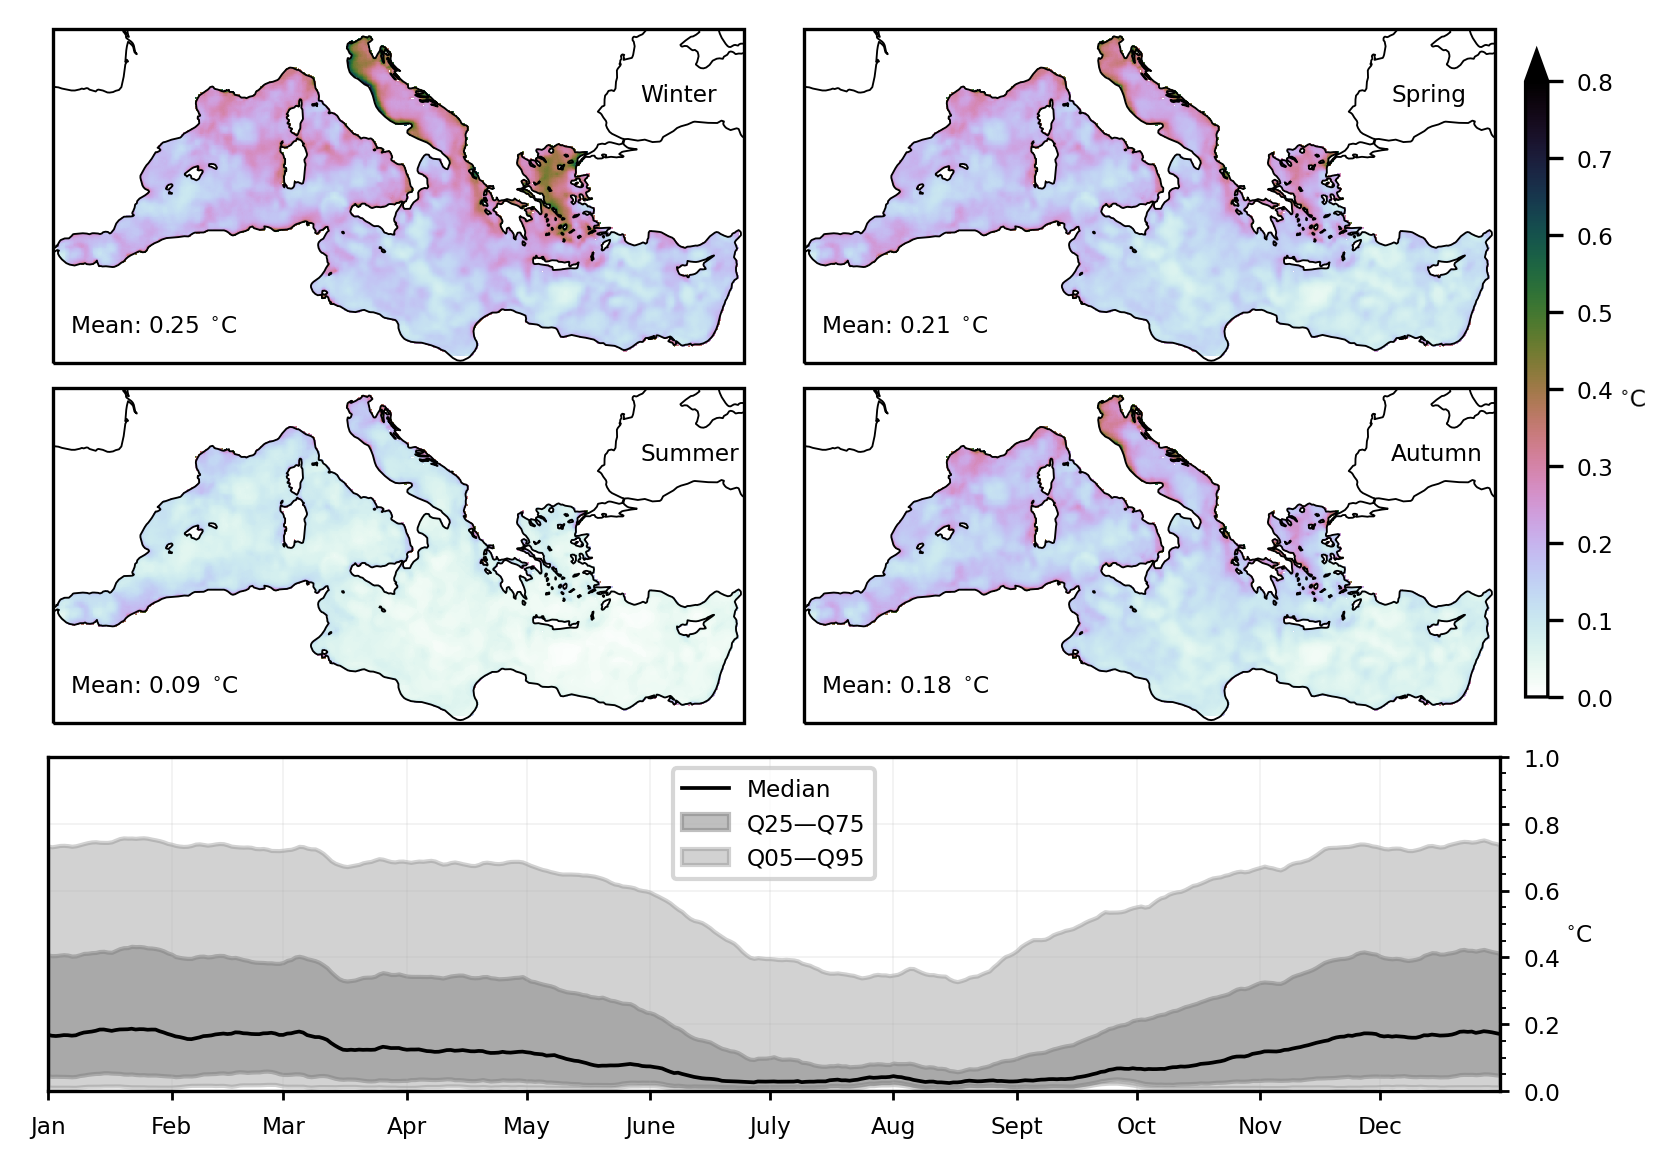

In [ ]:
savefold = "../../figures/"
savepath = f"{savefold}/fig_S2.jpeg"

plot_utils.season_plot(
    seasonal_mean,
    median,
    ((p25, p75), (p05, p95)),
    cmap="cubehelix_r",
    ratio=1.4,
    y_label="$^\circ$$\!$C",
    savepath=savepath,
)